In [1]:
import sys
import os
import src.data_processing as dp
from src.utils import *
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import torch

In [2]:
train_dl, x = dp.get_traindl((2001,2007), "mean_2m_air_temperature", "data/Tambov")
x.shape

torch.Size([72, 12, 234, 346])

In [4]:
x[:][1].shape

torch.Size([12, 234, 346])

In [4]:
x[1] = torch.cat([x[1],x[2]])

RuntimeError: The expanded size of the tensor (234) must match the existing size (468) at non-singleton dimension 0.  Target sizes: [234, 346].  Tensor sizes: [468, 346]

In [14]:
x = x.unsqueeze(dim=1)

In [18]:
x[1] = torch.cat([x[1].unsqueeze(dim=0), x[2].unsqueeze(dim=0)], dim=0)

RuntimeError: expand(torch.LongTensor{[2, 1, 234, 346]}, size=[1, 234, 346]): the number of sizes provided (3) must be greater or equal to the number of dimensions in the tensor (4)

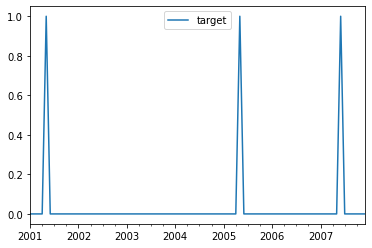

In [10]:
target.plot()
plt.show()

In [16]:
x[1].squeeze(dim=0).shape

torch.Size([234, 346])

In [11]:
x.shape

AttributeError: 'torch.Size' object has no attribute 'shape'

In [21]:
x[1].shape, x[2].shape

(torch.Size([234, 346]), torch.Size([234, 346]))

In [35]:
a = [x[1].unsqueeze(dim=0), x[2].unsqueeze(dim=0)]

In [36]:
b = torch.Tensor(2, 234, 346)
torch.cat(a, out=b)

tensor([[[266., 266., 266.,  ..., 265., 265., 265.],
         [266., 266., 266.,  ..., 265., 265., 265.],
         [266., 266., 266.,  ..., 265., 265., 265.],
         ...,
         [267., 267., 267.,  ..., 267., 267., 267.],
         [267., 267., 267.,  ..., 267., 267., 267.],
         [267., 267., 267.,  ..., 267., 267., 267.]],

        [[270., 270., 270.,  ..., 270., 270., 270.],
         [270., 270., 270.,  ..., 270., 270., 270.],
         [270., 270., 270.,  ..., 270., 270., 270.],
         ...,
         [273., 273., 273.,  ..., 272., 272., 272.],
         [273., 273., 273.,  ..., 272., 272., 272.],
         [273., 273., 273.,  ..., 272., 272., 272.]]])

In [37]:
b.shape

torch.Size([2, 234, 346])

In [42]:
x[:12].shape[0].item

12

In [50]:
tensors = []
for i in range(x.shape[0] - 12):
    tensors.append(x[i : i+12].unsqueeze(dim=0))

t = torch.Tensor(x.shape[0] - 12, 12, 234, 346)
torch.cat(tensors, out=t)
t.shape

torch.Size([72, 12, 234, 346])

In [46]:
tensors[0].shape

torch.Size([1, 12, 234, 346])

In [47]:
x.shape[0]

84